## Librerias

In [1]:
import sys
sys.path.append('../')
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from hyperopt import hp, fmin, tpe, Trials

In [2]:
from importlib import reload
import funciones  

# Recargar el módulo
reload(funciones)

<module 'funciones' from 'c:\\Users\\maria\\Desktop\\Business data\\2º Curso\\Casos practicos\\Reto 8\\R8_Naranja\\funciones.py'>

## Lectura datos

In [3]:
comp_c = pd.read_csv('Datos/Originales/Comp_C.csv')

In [4]:
comp_c.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.758687,12.7,0.000000,65.908308
1,0.756574,12.7,0.000000,66.551797
2,0.750645,13.1,0.000000,67.988530
3,0.745357,13.1,0.532897,68.881566
4,0.743977,13.5,4.425237,72.657725


## Estandarizar el df

In [5]:
x = comp_c.iloc[:,:-1]
y = comp_c.iloc[:, -1]

In [6]:
# Estandarizar el dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [7]:
# Guardo el scaler
with open('Modelos/Comp_c/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Train Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 44)

# Análisis de las variables

In [9]:
y.describe()

count    49705.000000
mean        92.493392
std         21.725193
min         54.588742
25%         71.830079
50%         88.936992
75%        111.417753
max        131.274307
Name: Potencia_Medida, dtype: float64

In [10]:
x.describe()

,Presion,Temperatura,Frecuencia
count,49705.000000,49705.000000,49705.000000
mean,0.755801,12.788935,26.707291
std,0.009212,7.020098,25.844649
min,0.727901,-3.200000,0.000000
25%,0.747439,7.300000,1.115993
50%,0.754395,12.200000,21.123530
75%,0.762912,17.400000,42.720023
max,0.781873,39.000000,100.000000


In [11]:
fun.graficar_correlaciones(X, y)

# Gráfico de distribución

c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



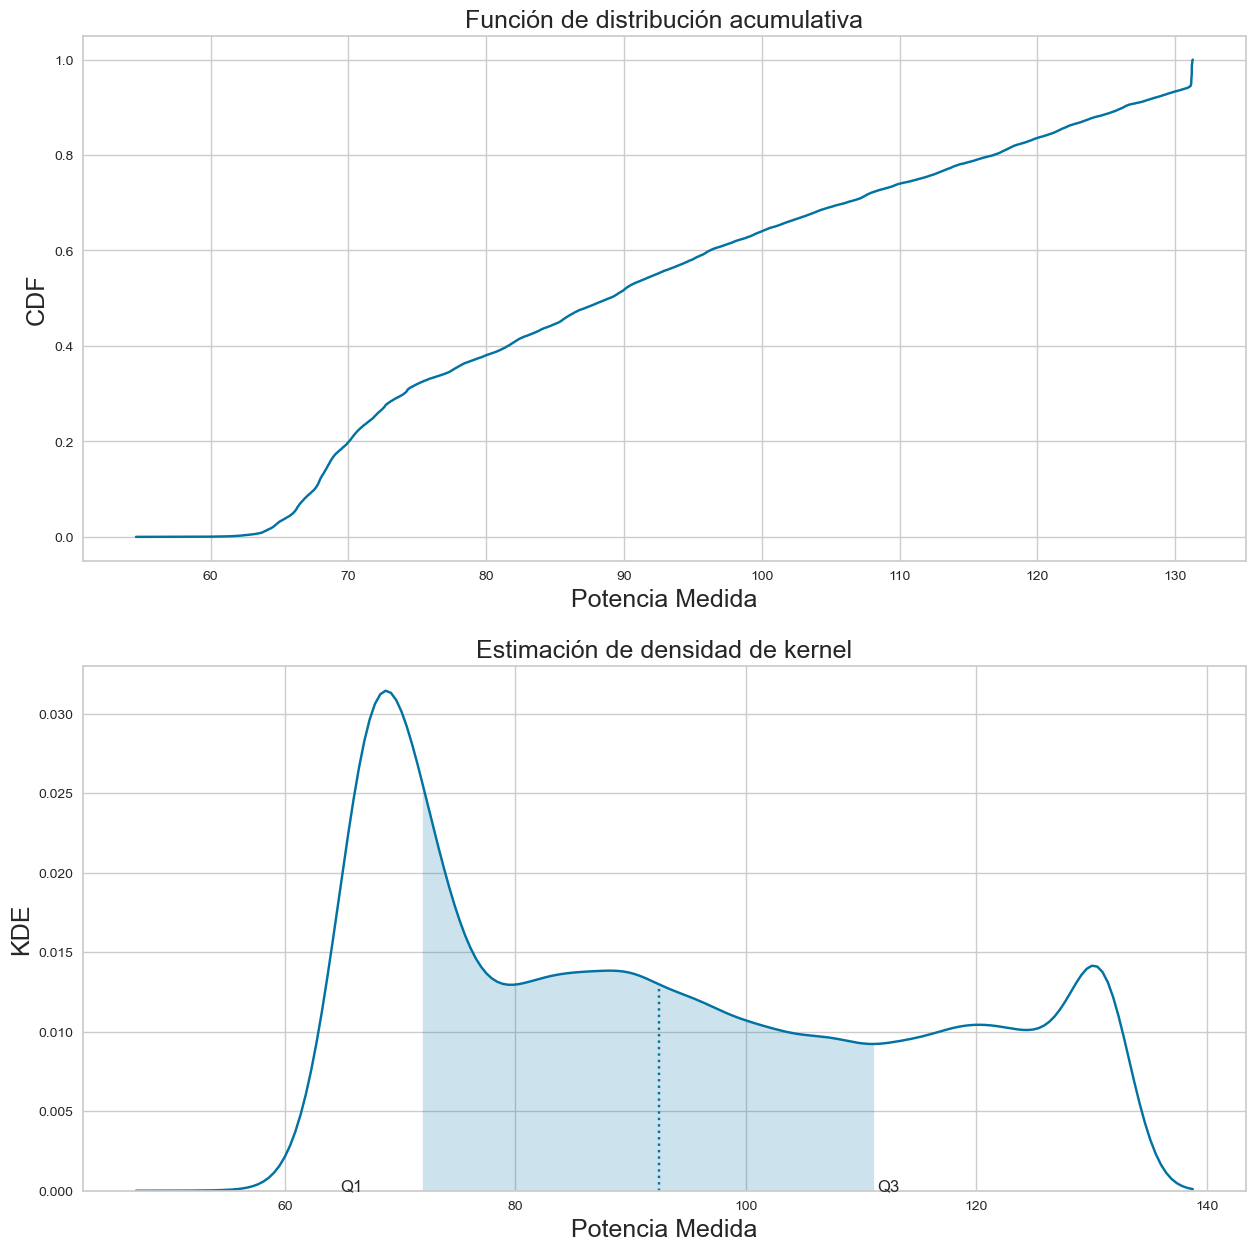

In [12]:
fun.grafico_distribucion(y)

## Modelos Base

In [13]:
compresor = 'c'

In [14]:
modelos = [
    ('LinearRegression', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('SVR', SVR(kernel='linear')),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=44)),
    ('TweedieRegressor', TweedieRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=44))
]

LinearRegression - TRAIN = R^2: 0.9577706566426339, RMSE: 4.464165913018272
 TEST = R^2: 0.957809601491558, RMSE: 4.461545433017794


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



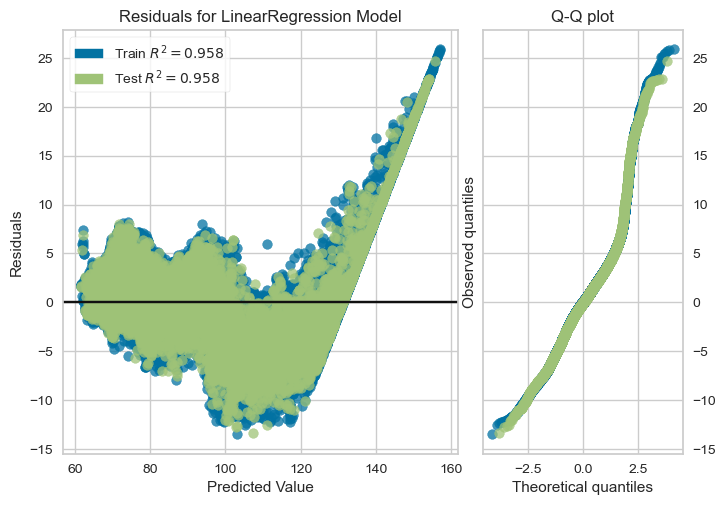

Lasso - TRAIN = R^2: 0.9100858815822086, RMSE: 6.5138632830200125
 TEST = R^2: 0.9098451275800101, RMSE: 6.521884564979927


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



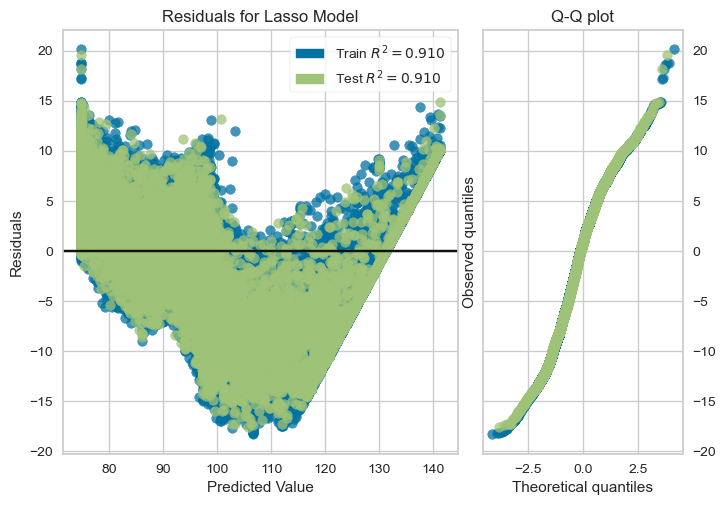

Ridge - TRAIN = R^2: 0.9577703751752292, RMSE: 4.464179735263829
 TEST = R^2: 0.9578101245770598, RMSE: 4.461517775339174


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



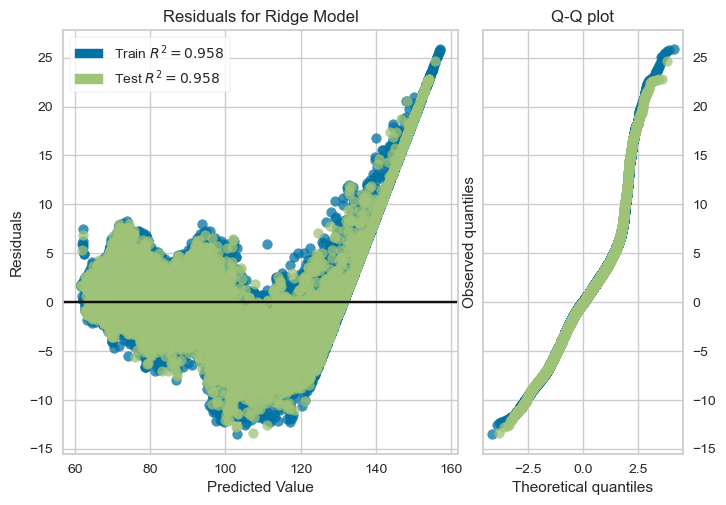

ElasticNet - TRAIN = R^2: 0.19762868621980964, RMSE: 19.459488276093253
 TEST = R^2: 0.1976392370385378, RMSE: 19.45643858151653


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



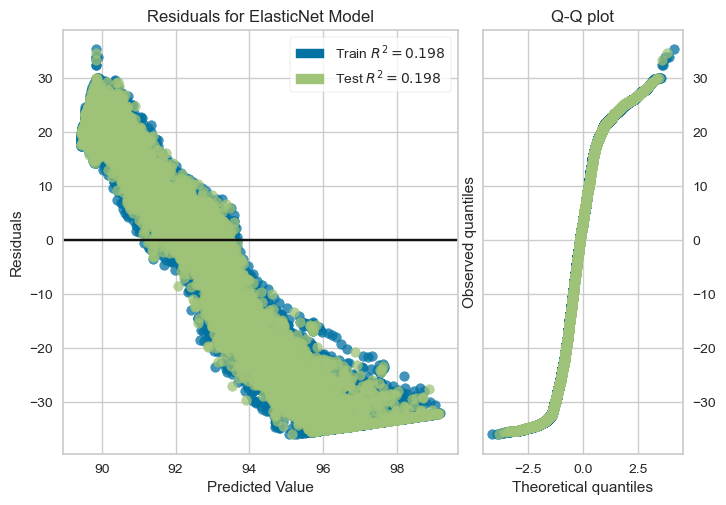

RandomForestRegressor - TRAIN = R^2: 0.9941099045331528, RMSE: 1.6672635198780994
 TEST = R^2: 0.994162262442723, RMSE: 1.6595899245208918


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



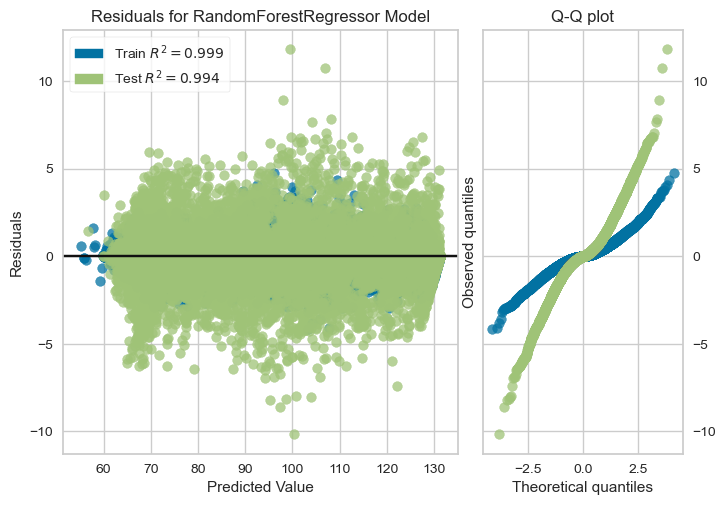

SVR - TRAIN = R^2: 0.952186662882965, RMSE: 4.750338702076009
 TEST = R^2: 0.9518042863235094, RMSE: 4.768510177921662


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



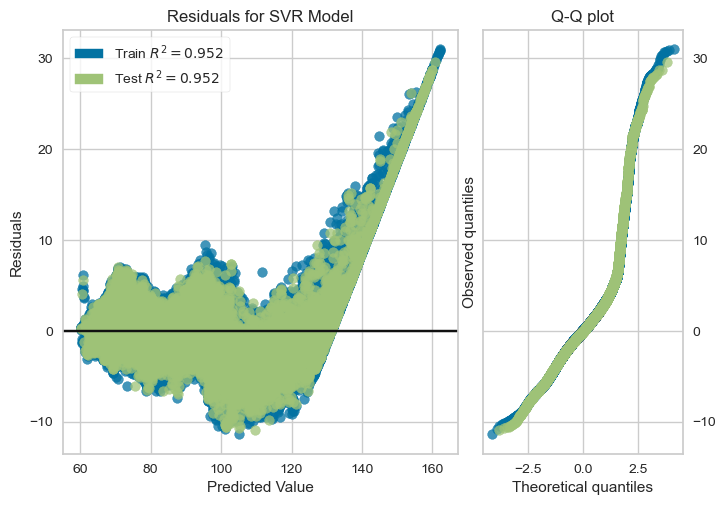

KNeighborsRegressor - TRAIN = R^2: 0.9934394244698364, RMSE: 1.7595740891567782
 TEST = R^2: 0.9937437370516226, RMSE: 1.7180508074067709


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



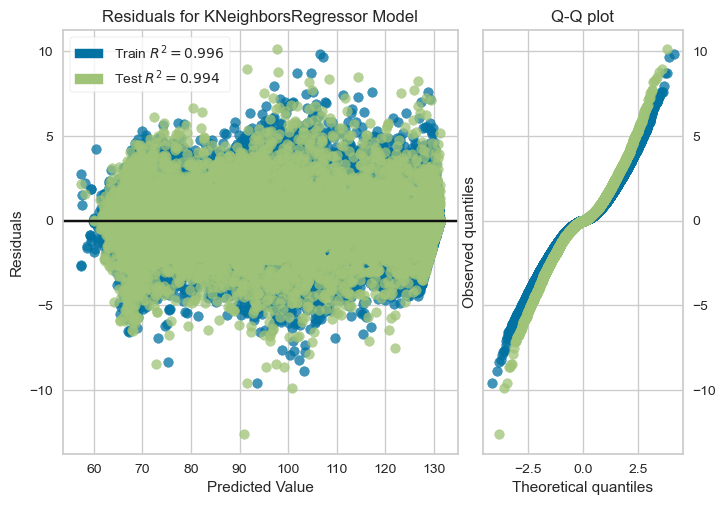

DecisionTreeRegressor - TRAIN = R^2: 0.9895059818204969, RMSE: 2.225456375627182
 TEST = R^2: 0.9897031578393127, RMSE: 2.2040961394321235


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



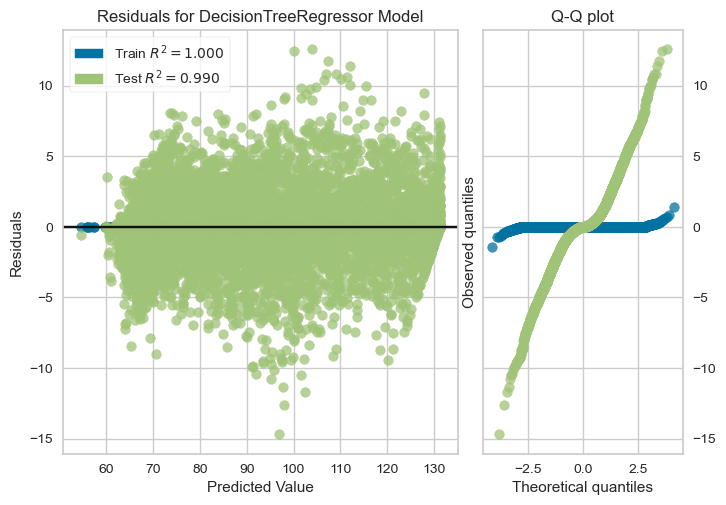

TweedieRegressor - TRAIN = R^2: 0.12173069834188266, RMSE: 20.359046132766377
 TEST = R^2: 0.12159258148561491, RMSE: 20.357596567475806


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but TweedieRegressor was fitted with feature names



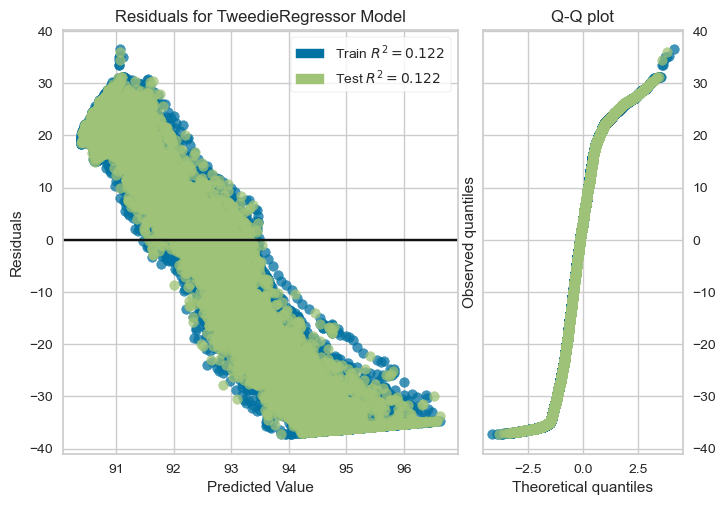

GradientBoostingRegressor - TRAIN = R^2: 0.9914921203038729, RMSE: 2.0036348926720775
 TEST = R^2: 0.9915125150034182, RMSE: 2.001096424137747


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



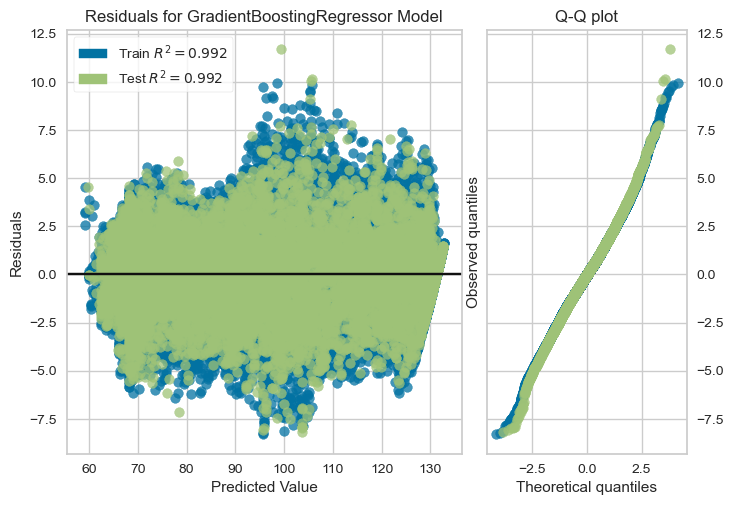

In [15]:
metricas_modelos = {}

for nombre_modelo, modelo in modelos:
    metricas_modelos[nombre_modelo] = fun.evaluar_modelo(modelo, nombre_modelo, compresor, X_train, y_train, X_test, y_test)

## OPTIMIZACIÓN DE HIPERPARÁMETROS

In [67]:
space = {
    'n_estimators': hp.randint('n_estimators', 50, 300),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
    'max_depth': hp.randint('max_depth', 1, 20),
    'min_samples_split': hp.randint('min_samples_split', 2, 100),  # Genera enteros entre 2 e infinito
    'min_samples_leaf': hp.randint('min_samples_leaf', 1, 100)  # Genera enteros entre 1 e infinito
}


# Definir la función objetivo
def objective(space):
    model = RandomForestRegressor(
        n_estimators=space['n_estimators'],
        min_samples_split=space['min_samples_split'],
        max_depth=space['max_depth'],
        min_samples_leaf=space['min_samples_leaf'],
        max_features=space['max_features'], 
        random_state=42,
        n_jobs=10
    )
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return -r2

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

# Imprimir los mejores hiperparámetros encontrados
print("Best Hyperparameters:", best)

  0%|          | 0/200 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

100%|██████████| 50/50 [06:34<00:00,  7.90s/trial, best loss: -0.9957095822630231]
Best Hyperparameters: {'max_depth': 3, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 5}

100%|██████████| 50/50 [09:27<00:00, 11.35s/trial, best loss: -0.9951415854091948]
Best Hyperparameters: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 5}

00%|██████████| 200/200 [35:18<00:00, 10.59s/trial, best loss: -0.9953834440464039]
Best Hyperparameters: {'max_depth': 18, 'max_features': 0, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 133}

## Modelo con hiperparámetros optimizados

In [30]:
# Definir los modelos
modelos = [RandomForestRegressor(max_depth=0, max_features=0, min_samples_leaf=6, min_samples_split=10, n_estimators=5)]


# Realizar la validación cruzada y calcular la media de las puntuaciones para cada modelo
for modelo in modelos:
    nombre_modelo = f'{type(modelo).__name__}_optimizado'
    
    # Calcular R^2
    r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    r2_score_promedio = np.mean(r2_scores)
    
    # Calcular RMSE
    rmse_scores = cross_val_score(modelo, X, y, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_score_promedio = np.sqrt(np.mean(rmse_scores))
    
    # Almacenar los resultados en el diccionario
    resultados_modelos[nombre_modelo] = {'R^2': r2_score_promedio, 'RMSE': rmse_score_promedio}
    
    # Entrenar el modelo con todos los datos
    modelo.fit(X, y)
    
    # Guardar el modelo con pickle en la carpeta 'Modelos'
    ruta_modelo = os.path.join('Modelos/Comp_b', f'{nombre_modelo}_modelo.pkl')
    with open(ruta_modelo, 'wb') as modelo_archivo:
        pickle.dump(modelo, modelo_archivo)

    print(f"{nombre_modelo} - R^2: {r2_score_promedio}, RMSE: {rmse_score_promedio}")

    # Agregar análisis de residuos
    visualizer = ResidualsPlot(modelo, hist=False, qqplot=True)
    visualizer.fit(X_train, y_train)  # Fit the data to the visualizer
    visualizer.score(X_test, y_test)
    visualizer.show()  # Finalize and render the figure

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestRegressor must be an int in the range [1, inf) or None. Got 0 instead.
